# Taxi Fare Prediction

<u>Abstract:</u>
    
    In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more datacentric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess

<u>Problem Statement:</u>
    
    Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.


<u>Dataset Information:</u>
    
<table width="600">
<tbody>
<tr>
<td width="216">
<p>Column</p>
</td>
<td width="384">
<p>Description</p>
</td>
</tr>
<tr>
<td width="216">
<p>unique_id</p>
</td>
<td width="384">
<p>A unique identifier or key for each record in the dataset</p>
</td>
</tr>
<tr>
<td width="216">
<p>date_time_of_pickup</p>
</td>
<td width="384">
<p>The time when the ride started</p>
</td>
</tr>
<tr>
<td width="216">
<p>longitude_of_pickup</p>
</td>
<td width="384">
<p>Longitude of the taxi ride pickup point</p>
</td>
</tr>
<tr>
<td width="216">
<p>latitude_of_pickup</p>
</td>
<td width="384">
<p>Latitude of the taxi ride pickup point</p>
</td>
</tr>
<tr>
<td width="216">
<p>longitude__of_dropoff</p>
</td>
<td width="384">
<p>Longitude of the taxi ride dropoff point</p>
</td>
</tr>
<tr>
<td width="216">
<p>latitude_of_dropoff</p>
</td>
<td width="384">
<p>Latitude of the taxi ride dropoff point</p>
</td>
</tr>
<tr>
<td width="216">
<p>no_of_passenger</p>
</td>
<td width="384">
<p>count of the passengers during the ride</p>
</td>
</tr>
<tr>
<td width="216">
<p>amount</p>
</td>
<td width="384">
<p>(target variable)the dollar amount of the cost of the taxi ride</p>
</td>
</tr>
</tbody>
</table>

<u>Scope:</u>
    
    Prepare and analyse data
    Perform feature engineering wherever applicable
    Check the distribution of key numerical variables
    Training a Random Forest model with data and check it’s performance
    Perform hyperparameter tuning

<u>Learning Outcome:</u>
    
    The students will get a better understanding of how the variables are linked to each other and how the EDA approach will help them gain more insights and knowledge about the data that we have and train Random Forest model with the data. 
    Also, using GridSerachCV to get best hyperparameters to build optimized Random Forest model for prediction.

Lets start by importing necessary libraries

In [1]:
# to load the dataset

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# For EDA :
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# Override pyplot settings by seaborn theme
sns.set()

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# To display maximum columns
pd.set_option("display.max_columns",None)

# suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#### Read Data

Read and display data to get insights from the data

In [2]:
# read csv file using pandas
df = pd.read_csv('TaxiFare.csv',header=0,index_col=0)

# display the top 5 rows of the dataframe
df.head()

# Note: To display more rows, example 10, use head(10)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


The column unique_id contains the unique identifier for each observation, which is redundant for further analysis. Thus, we use it as our index column.

#### Understand the Data

Check the data type.

In [3]:
# 'shape' returns the dimensions of the data
df.shape

(50000, 7)

In [4]:
# use 'dtypes' to check the data type of each variable
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

From the above output, we see that the data type of 'date_time_of_pickup' is 'object '.
But according to data definition, 'date_time_of_pickup 'is a date-timestamp variable, which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.

In [5]:
df.date_time_of_pickup=pd.to_datetime(df.date_time_of_pickup)

In [6]:
# Recheck using 'dtypes' to check the data type of each variable
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

#### Feature Engineering

We will extract new features from variable date_time_of_pickup . We will also add a variable which measures the distance between the pickup and dropoff point.

In [7]:
# extract various date time components as seperate variables
df = df.assign(hour = df.date_time_of_pickup.dt.hour, 
               day = df.date_time_of_pickup.dt.day,
               month = df.date_time_of_pickup.dt.month, 
               year = df.date_time_of_pickup.dt.year, 
               dayofweek = df.date_time_of_pickup.dt.dayofweek
              )

In [8]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
unique_id,,,,,,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


we no longer need 'date_time_of_pickup' as we have converted all information of date time to its respectiv columns and hence we drop it.

In [9]:
df.drop("date_time_of_pickup",axis=1,inplace=True)

We will add a new variable which measures the distance between the pickup and dropoff point. We will use the Haversine formula to compute the distance between two points of the journey, using the logitude and latitude values.

<b>Haversine :  </b><a href="https://en.wikipedia.org/wiki/Haversine_formula"> What is Haversine ? </a>

###### Manual Code

In [10]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

    #Add a new variable travel distance

    df['travel_dist_km'] = distance_transform(df['longitude_of_pickup'].to_numpy(),
                                                    df['latitude_of_pickup'].to_numpy(),
                                                    df['longitude_of_dropoff'].to_numpy(),
                                                    df['latitude_of_dropoff'].to_numpy()
                                                  )

###### Using Haversine library

    pip install haversine

In [11]:
from haversine import haversine, Unit

#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)

df['travel_dist_km'] = df.apply(lambda row: haversine((row["latitude_of_pickup"],row["longitude_of_pickup"]),(row["latitude_of_dropoff"],row["longitude_of_dropoff"]), Unit.KILOMETERS),axis=1)

In [12]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
unique_id,,,,,,,,,,,,
26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030765
52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450145
35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389527
30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799274
51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999160


We see that the distance in Km is added.

#### Summary Statistics

As now have the required features, after having extracted new ones and dropping the redundant variables.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 26:21.0 to 13:14.0
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
 11  travel_dist_km        50000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 5.0+ MB


Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for other variable types.

In [14]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
# use .transpose() (.T) for better readability. However it is optional
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734371,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
day,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
year,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.

Note that the minimum amount is -5 and maximum is 200. Ideally fare amount should not be less that 2.5 dollars, which is the minimum value set for fares in NYC. Also the minimum count of passengers is 0, which isn't a practical scenario. We will deal with such values as we progress the case study.

#### Discover Outliers

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease. Let us detect the extreme values in the data.

The following can be considered as outliers in this case study:

Amount < 2.5

Trips where 90< latitude <-90, 180 < longitude < -180

--------------------------------------------------------------------------------------------------------------

Amount < 2.5

We have seen that there are instances of amount less that 0 as well in the data set, where as the minimum fare for any trip in NYC is 2.5 dollars, hence we will remove such observations. We have already seen that the max fare is 200 in the data set.

In [15]:
#We will only keep the observation where fare is between 2.5
df = df.loc[(df.amount >= 2.5)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (49990, 12)


Remove the observations with travel distance less than 0

In [16]:
#We will only keep the observation where travel distance is greater than 0 and less than or equal to 130
df = df.loc[(df.travel_dist_km > 0)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (48541, 12)


Remove the observations with unreal longitude and latitude values , that is , 90< latitude <-90, 180 < longitude < -180.

In [17]:
incorrect_coordinates = df.loc[(df.latitude_of_pickup > 90) |(df.latitude_of_pickup < -90) |
                                   (df.latitude_of_dropoff > 90) |(df.latitude_of_dropoff < -90) |
                                   (df.longitude_of_pickup > 180) |(df.longitude_of_pickup < -180) |
                                   (df.longitude_of_dropoff > 90) |(df.longitude_of_dropoff < -90)
                                    ].index

In [18]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (48211, 12)


The number of observations is reduced to 48211 from 50000 which suggests that we have removed the observations with extreme or immpractical values.

<a href="https://bit.ly/33bgNpq">How to use statistics to identify outliers in data</a>

#### Missing Values

Check the missing values

In [19]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour                    0
day                     0
month                   0
year                    0
dayofweek               0
travel_dist_km          0
dtype: int64

None of the variables contain missing values

#### Exploratory Data Analysis

##### Correlation Matrix

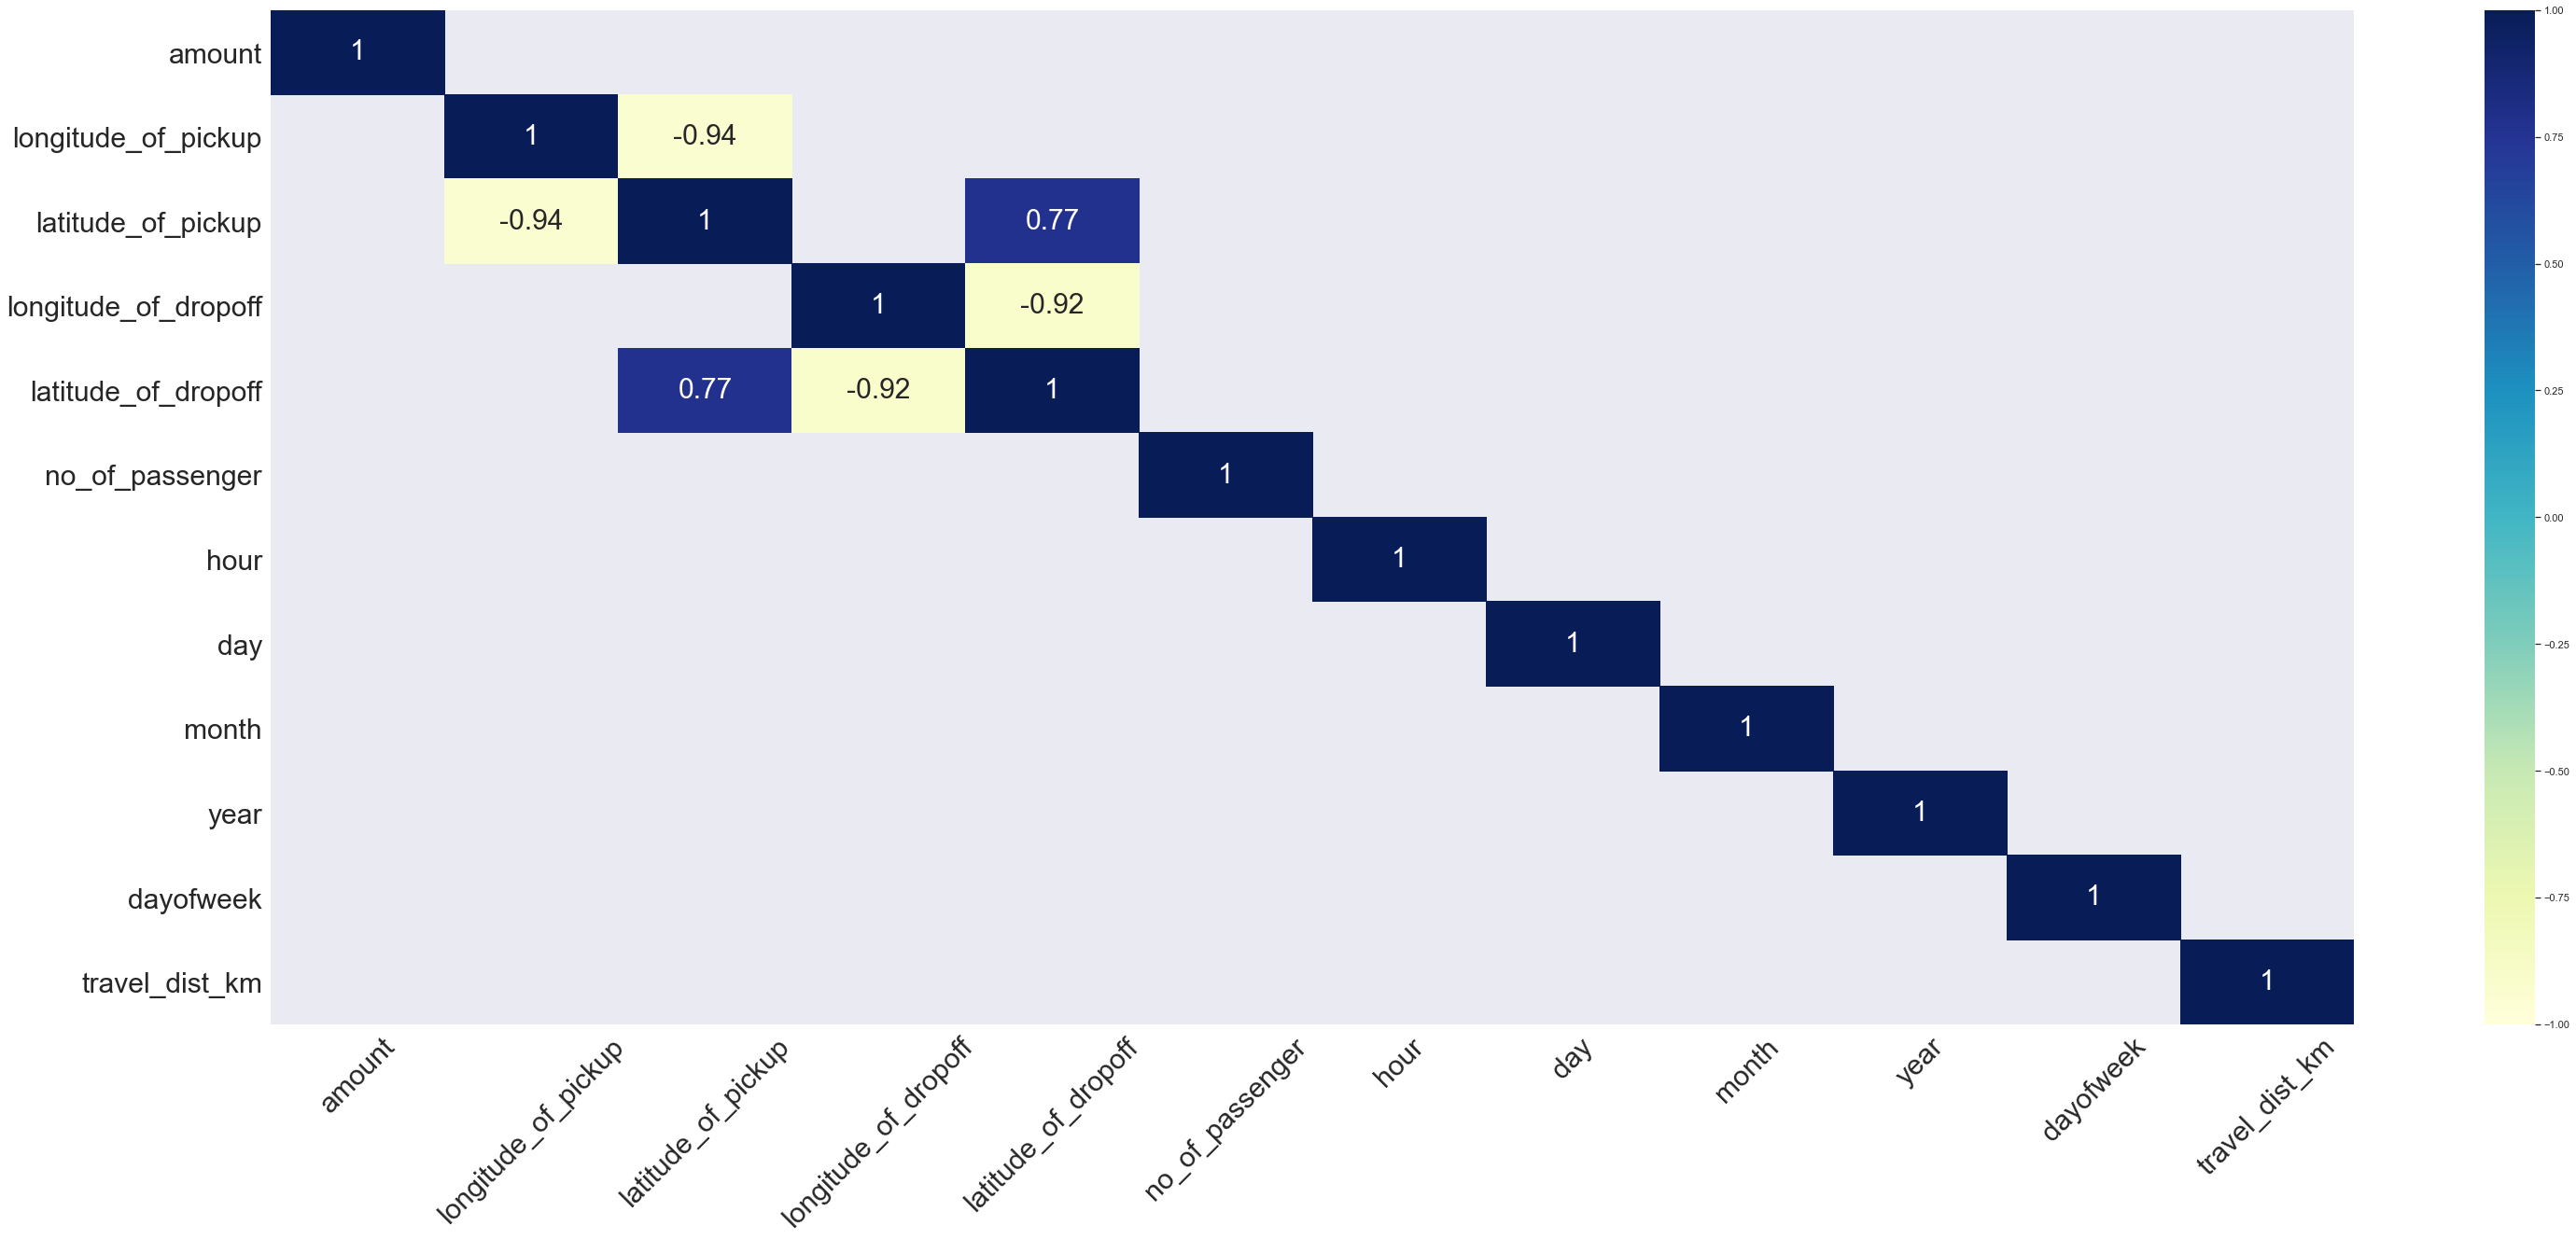

In [20]:
# set figure size
plt.figure(figsize=(50, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
corr = df.corr()
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 30})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 30, rotation=45)
plt.yticks(fontsize = 30, rotation=0)

# display the plot
plt.show()

Let us use count plot and see for number of obs for each unique values

In [21]:
df.dayofweek.unique()

array([0, 1, 3, 5, 2, 6, 4], dtype=int64)

<AxesSubplot:title={'center':'Taxi trips count during weekdays'}, xlabel='hour', ylabel='count'>

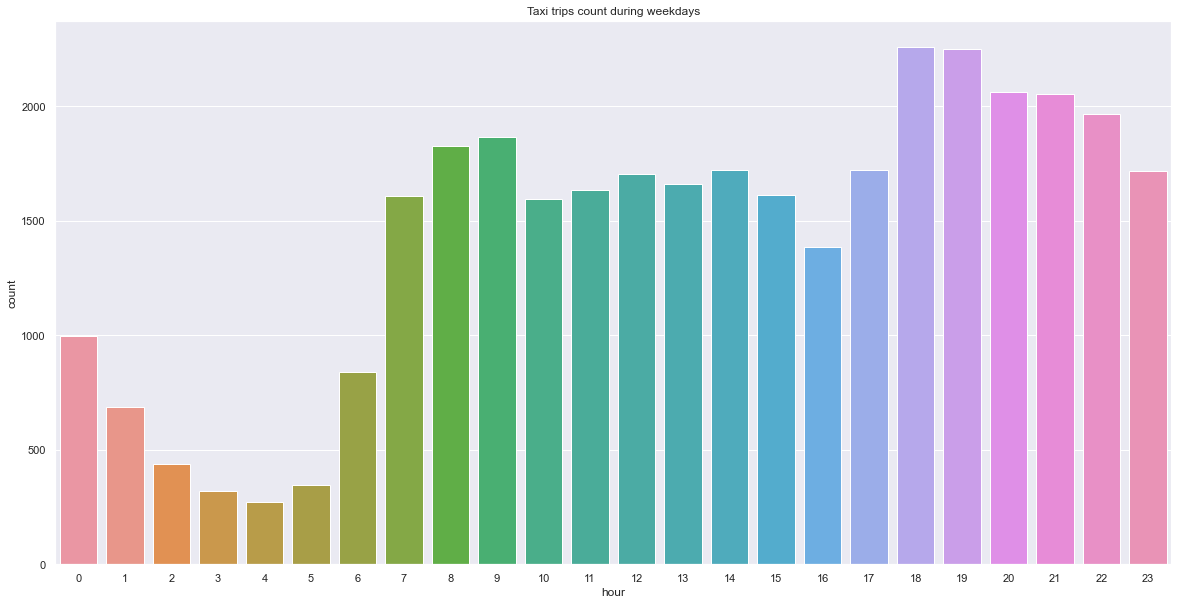

In [22]:
plt.figure(figsize=(20,10))
plt.title('Taxi trips count during weekdays')
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek < 5)])

We see that during the weekdays the count of trips start to peak from 8 am and is highest at 9am.

In the evening the peak is at 6pm and 7pm.

<AxesSubplot:title={'center':'Taxi trips count during weekends'}, xlabel='hour', ylabel='count'>

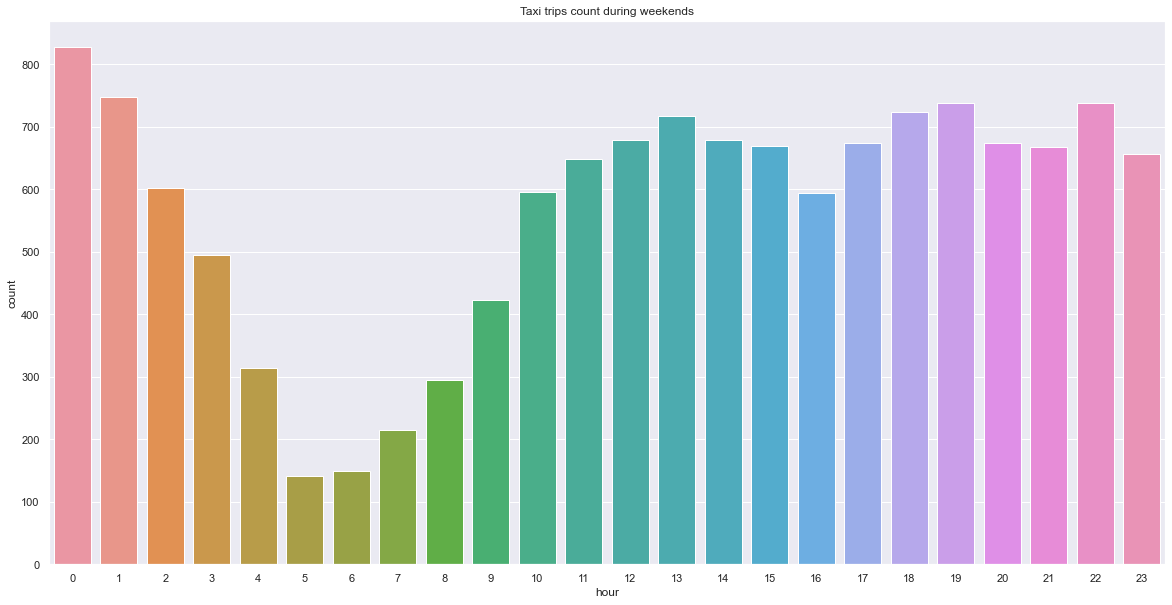

In [23]:
plt.figure(figsize=(20,10))
plt.title('Taxi trips count during weekends')
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)])

This pattern is different from the weekdays. 
In the evening the demand is almost evenly high after 6pm till late night except a slight dip at 8pm and 9pm.

<AxesSubplot:xlabel='day', ylabel='count'>

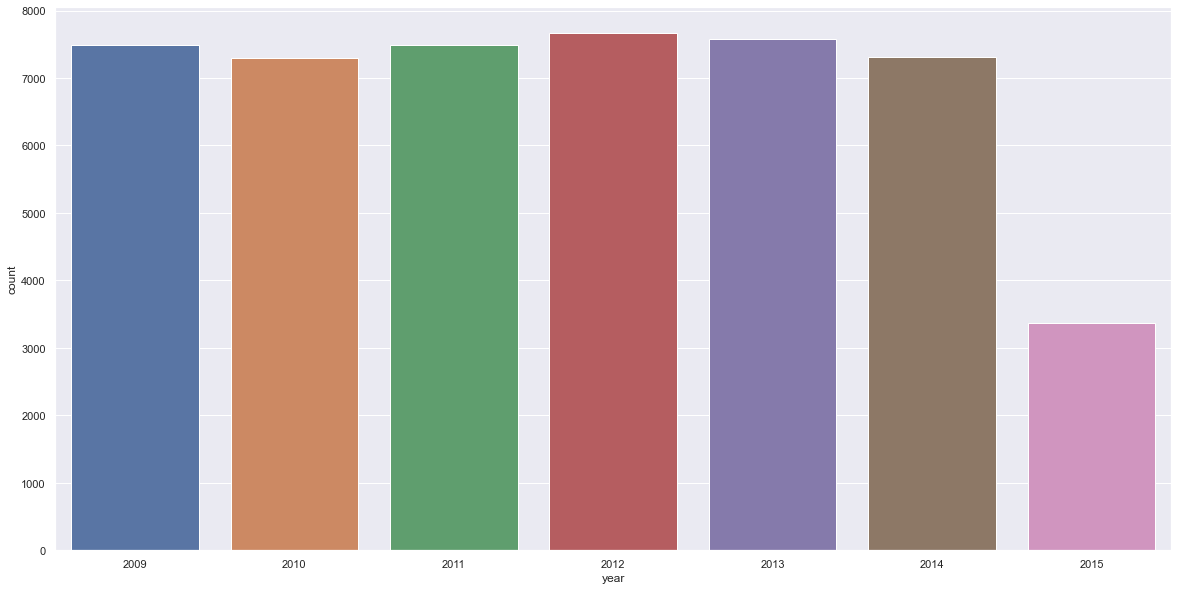

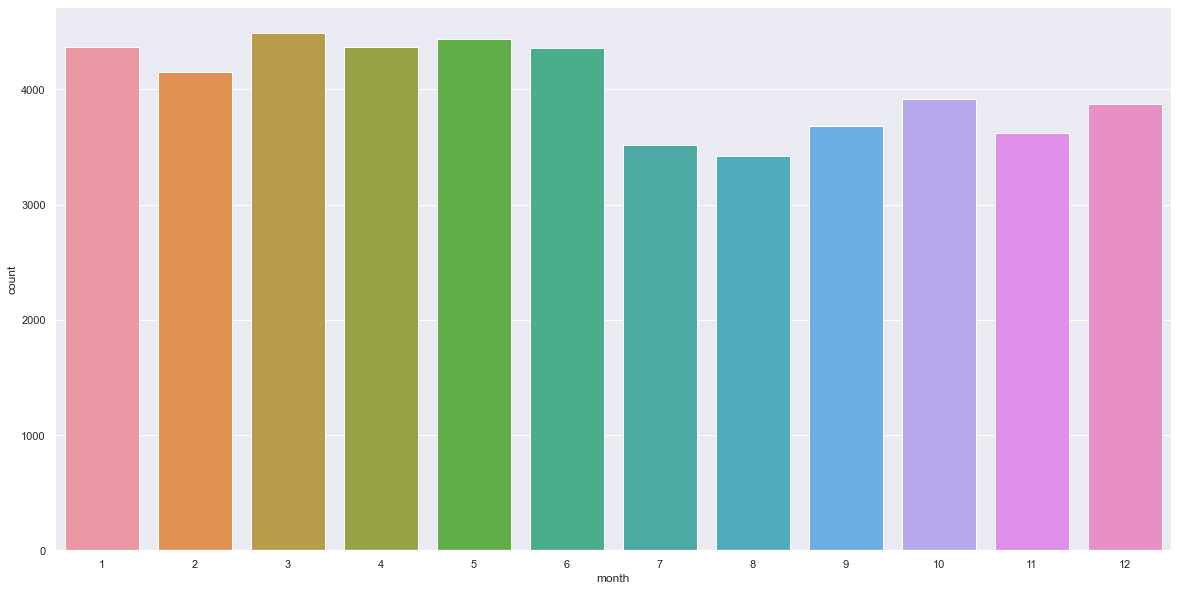

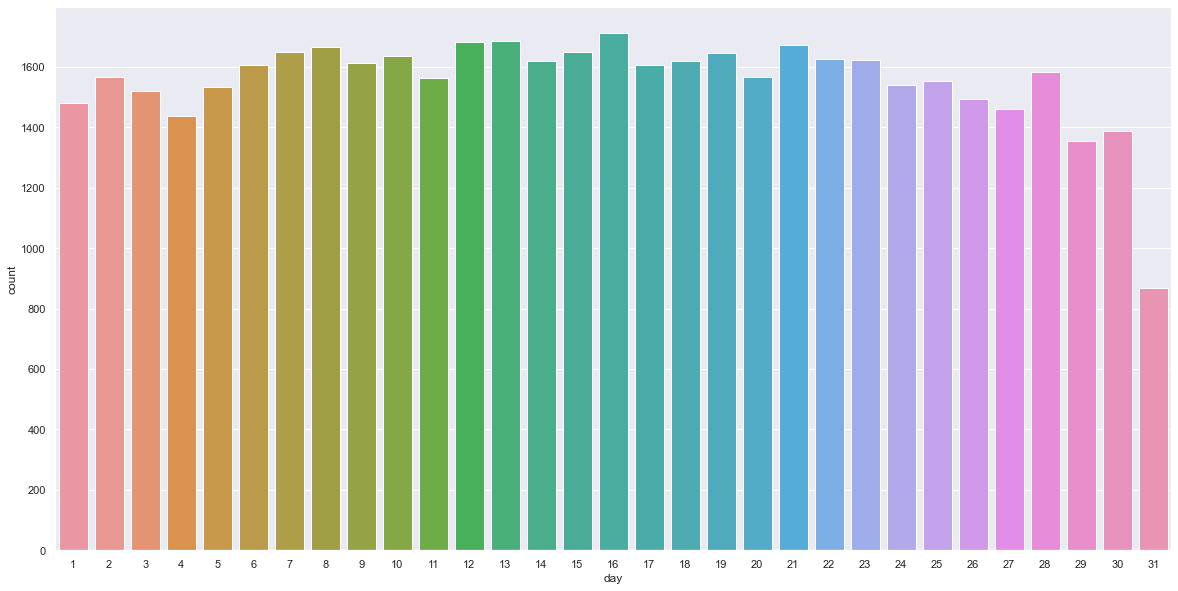

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(df['year'])
# plt.savefig('year.png')

plt.figure(figsize=(20,10))
sns.countplot(df['month'])
# plt.savefig('month.png')

plt.figure(figsize=(20,10))
sns.countplot(df['day'])
# plt.savefig('day_of_week.png')



<AxesSubplot:title={'center':'No of passenger count during weekends'}, xlabel='no_of_passenger', ylabel='count'>

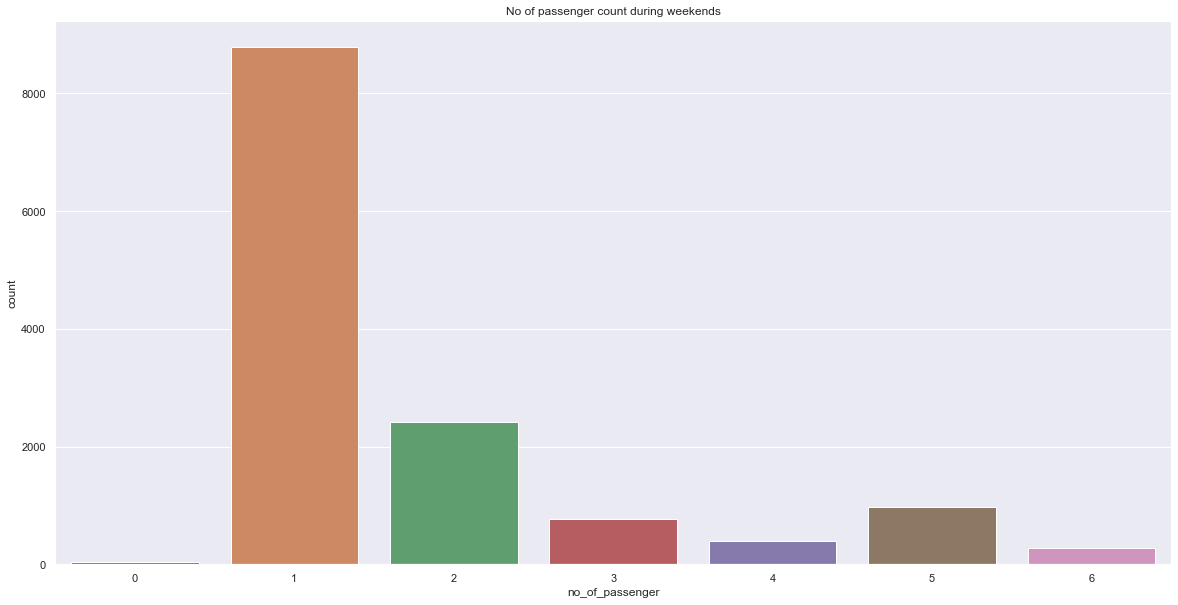

In [25]:
#no_of_passenger
plt.figure(figsize=(20,10))
plt.title('No of passenger count during weekends')
sns.countplot(x='no_of_passenger', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)])
# plt.savefig('no_of_passenger.png')

<AxesSubplot:title={'center':'No of passenger count during weekdays'}, xlabel='no_of_passenger', ylabel='count'>

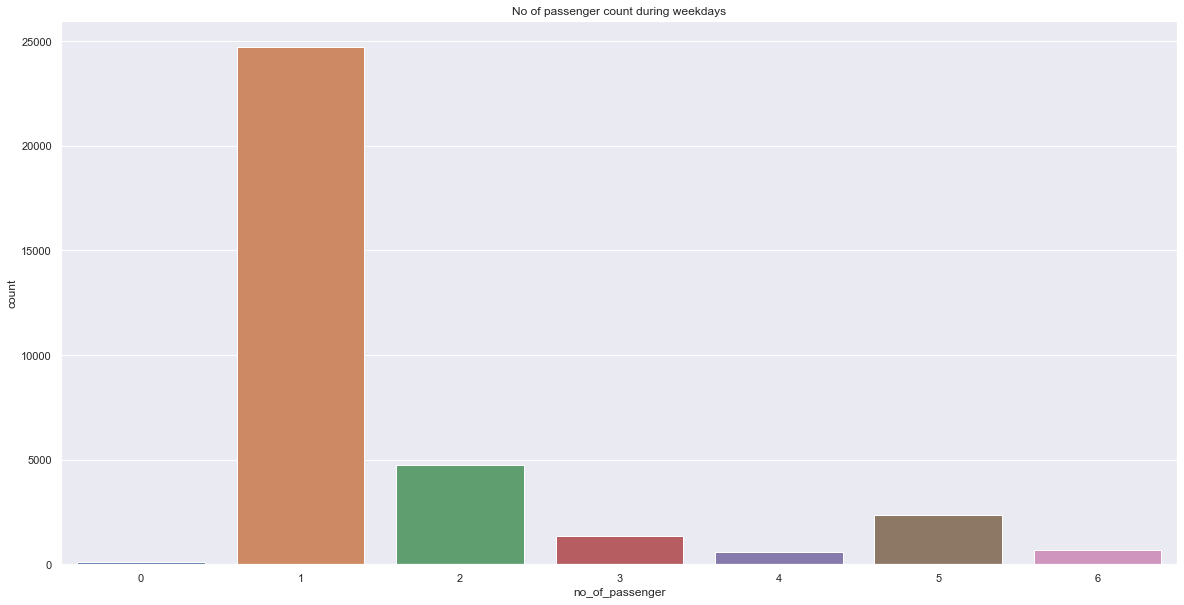

In [26]:
#no_of_passenger
plt.figure(figsize=(20,10))
plt.title('No of passenger count during weekdays')
sns.countplot(x='no_of_passenger', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <5)])
# plt.savefig('no_of_passenger.png')

we do not see any significant change here

In [27]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
unique_id,,,,,,,,,,,,
26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030765
52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450145
35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389527
30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799274
51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999160


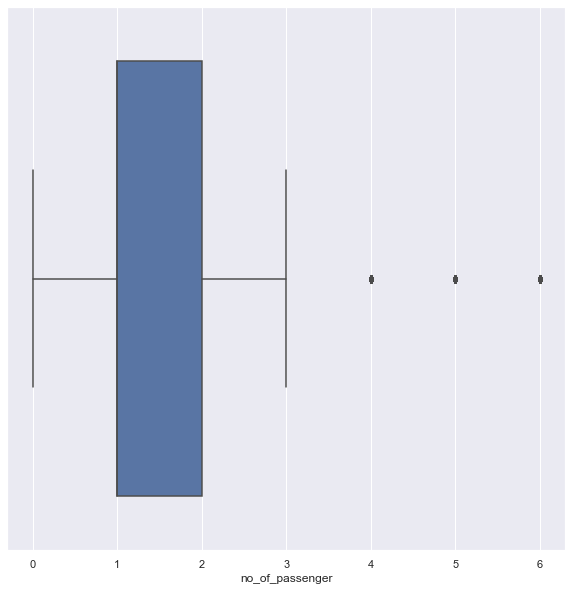

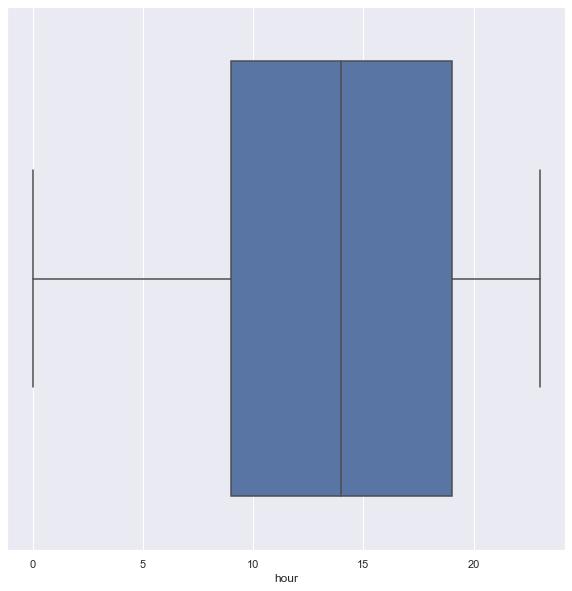

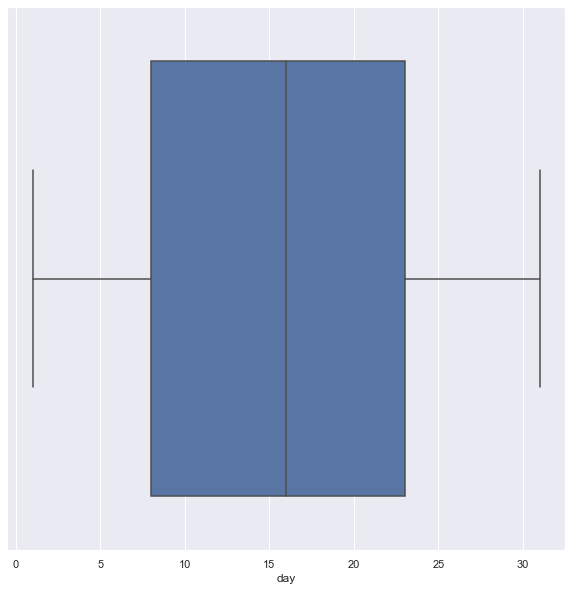

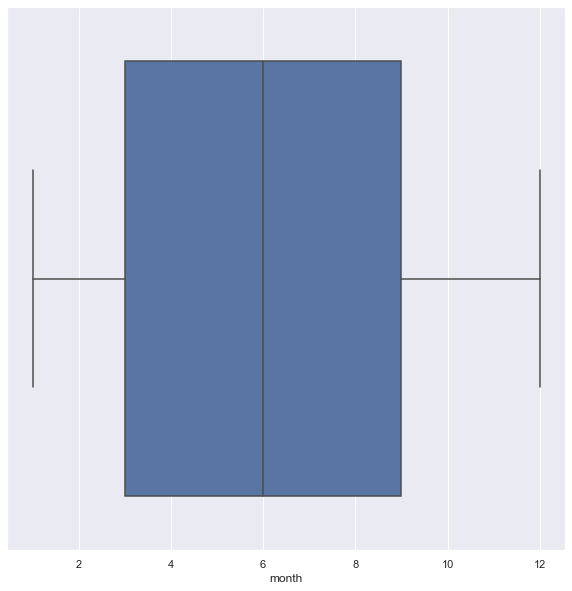

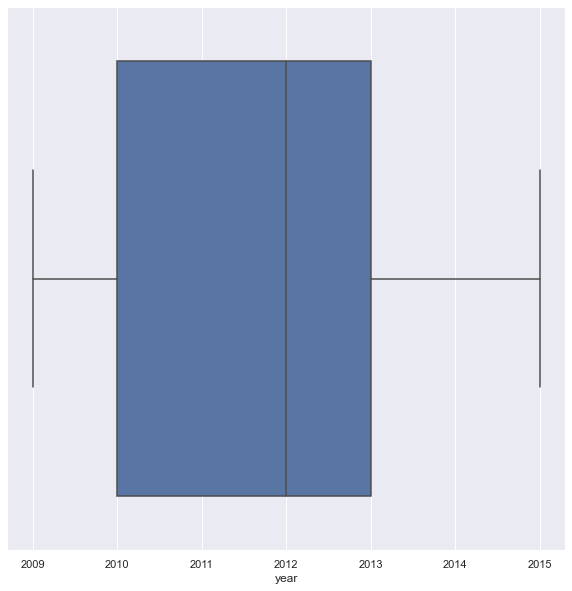

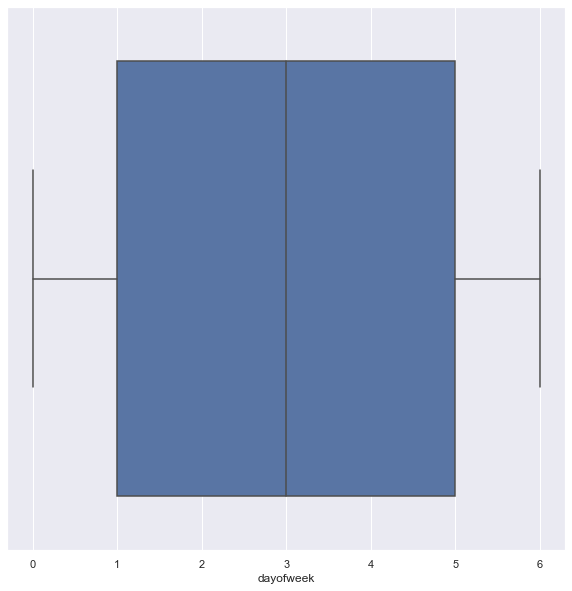

In [28]:
# box plots are also useful in terms of seeing outliers
# If you want, you can visualize other features as well.
for col_name in df.columns[5:-1]:
    #plot size
    plt.figure(figsize=(10,10))
    sns.boxplot(df[col_name])

#### Spliting the data into X and Y

In [29]:
Y = df.amount

In [30]:
X = df.iloc[:,5:]

In [31]:
print(X.shape)
X.head()

(48211, 7)


,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
unique_id,,,,,,,
26:21.0,1,17,15,6,2009,0,1.030765
52:16.0,1,16,5,1,2010,1,8.450145
35:00.0,2,0,18,8,2011,3,1.389527
30:42.0,1,4,21,4,2012,5,2.799274
51:00.0,1,7,9,3,2010,1,1.999160


In [32]:
Y.shape

(48211,)

#### Scaling the Independednt variable i.e. X

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

#### Splitting the data into train and test

In [34]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)  
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",Y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",Y_test.shape)

The shape of X_train is: (33747, 7)
The shape of X_test is: (14464, 7)
The shape of y_train is: (33747,)
The shape of y_test is: (14464,)


#### Fuction determining the evaluation of the model

In [35]:
eval_table = pd.DataFrame(columns = ['model_name', 'r_square', 'adjusted_R_square', 'RMSE', 'MSE', 'MAE', 'K-fold_mean'])

In [36]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_squared_error

def evaluation_table(model_name, Y_test, Y_pred, k_fold_mean):
    
    if k_fold_mean is None:
        k_fold_mean = 'NA'

    # Calculate R^2 Coefficient of determination
    r2=r2_score(Y_test,Y_pred)
    print("R-squared:",r2)
    
    # Calculate Adjusted R^2
    adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    print("Adj R-square:",adjusted_r_squared)

    # Calculate RMSE
    rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    print("RMSE:",rmse)

    # Calculate MAE   
    MAE = mean_absolute_error(Y_test,Y_pred)
    print('Mean Absolute Error (MAE):', MAE)

    # Calculate MSE
    MSE = mean_squared_error(Y_test,Y_pred)
    print('Mean Squared Error (MSE):', MSE)
    
    return [model_name, r2, adjusted_r_squared, rmse, MSE, MAE, k_fold_mean]  

#### K-Fold fucntion

A good technique to use cross validation while working with any model to avoid over fitting

In [37]:
# K-fold sklearn import
from sklearn.model_selection import KFold

# to check the r2 for kfold cv
from sklearn.model_selection import cross_val_score

def k_fold_validation_prediction(model, num_of_splits, X_train, Y_train, X_test, Y_test ):
    
    #Using cross validation = creating a clone of the model object
    classifier=model

    #performing kfold_cross_validation
    kfold_cv=KFold(n_splits=num_of_splits, random_state=10, shuffle = True)
    print("kfold_cv : ",kfold_cv)

    #running the model using scoring metric as accuracy
    kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
    #print("\nkfold_cv_result : ",kfold_cv_result)
    
    #finding the mean
    k_fold_mean = kfold_cv_result.mean()
    print("kfold_cv_result.mean() : ",k_fold_mean)
    
    #model training and tuning
    for train_value, test_value in kfold_cv.split(X_train):
        classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    # predict on the tuned model
    Y_pred=classifier.predict(X_test)
    #print(list(zip(Y_test,Y_pred)))
    
    # return values
    return Y_pred, k_fold_mean


In [38]:
from sklearn.ensemble import RandomForestRegressor

#predicting using the Gradient_Boosting
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import ExtraTreesRegressor

from catboost import CatBoostRegressor

from sklearn.linear_model import Ridge


#### Random Forest Regressor

In [39]:
#intantiate the regressor (, warm_start=True, oob_score=True)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10, max_depth = 10, min_samples_split = 20)

# fit the regressor with training dataset
rf_reg.fit(X_train, Y_train)

# predict the values on test dataset using predict()
Y_pred = rf_reg.predict(X_test)


In [40]:
eval_table = eval_table.append(pd.Series(evaluation_table('RandomForest_Regressor', Y_test, Y_pred, None), index = eval_table.columns), ignore_index=True)

R-squared: 0.8011587580055691
Adj R-square: 0.8011298824440074
RMSE: 4.407994802759462
Mean Absolute Error (MAE): 2.1446829862923376
Mean Squared Error (MSE): 19.430418181154426


#### Random Forest - K-fold

In [41]:
#intantiate the regressor (, warm_start=True, oob_score=True)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# predict the values on test dataset using predict()
Y_pred, k_fold_mean = k_fold_validation_prediction(rf_reg, int(10), X_train, Y_train, X_test, Y_test)


kfold_cv :  KFold(n_splits=10, random_state=10, shuffle=True)
kfold_cv_result.mean() :  0.7686187458414706


In [42]:
eval_table = eval_table.append(pd.Series(evaluation_table('RandomForest_Regressor-Kfold', Y_test, Y_pred, k_fold_mean), index = eval_table.columns), ignore_index=True)

R-squared: 0.7783914442297994
Adj R-square: 0.7783592624176634
RMSE: 4.653514826330568
Mean Absolute Error (MAE): 2.2709233568399703
Mean Squared Error (MSE): 21.655200238878415


##### Feature importance

In [43]:
d = dict(zip(['no_of_passenger','hour','day','month','year','dayofweek','travel_dist_km'],rf_reg.feature_importances_))
for w in sorted(d, key=d.get, reverse=True):
    print(w ,'\t\t::', d[w])

travel_dist_km 		:: 0.8400133774762428
hour 		:: 0.036138367935571895
year 		:: 0.035269097734370855
day 		:: 0.03075620841897775
month 		:: 0.025604987985688724
dayofweek 		:: 0.021554702879729246
no_of_passenger 		:: 0.010663257569418752


let us build the model using the first three features and check if there is an increase in accuracy score

In [44]:
X_rev = df.loc[:,['travel_dist_km', 'year', 'hour'] ]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_rev)
X_rev = scaler.transform(X_rev)

In [46]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_rev, Y, test_size=0.3,random_state=10)

In [47]:
#intantiate the regressor (, warm_start=True, oob_score=True)
rf_reg1 = RandomForestRegressor(n_estimators=100, random_state=10)

# predict the values on test dataset using predict()
Y_pred, k_fold_mean = k_fold_validation_prediction(rf_reg, int(10), X_train1, Y_train1, X_test1, Y_test1)


kfold_cv :  KFold(n_splits=10, random_state=10, shuffle=True)
kfold_cv_result.mean() :  0.7460651038097936


In [48]:
eval_table = eval_table.append(pd.Series(evaluation_table('RandomForest_Regressor-featureImp', Y_test, Y_pred, k_fold_mean), index = eval_table.columns), ignore_index=True)

R-squared: 0.7515503151927889
Adj R-square: 0.7515142355339782
RMSE: 4.927277990377626
Mean Absolute Error (MAE): 2.407849025972529
Mean Squared Error (MSE): 24.27806839445978


#### GradientBoostingRegressor

In [49]:
gradientRegressor=GradientBoostingRegressor(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
gradientRegressor.fit(X_train,Y_train)

Y_pred=gradientRegressor.predict(X_test)
eval_table = eval_table.append(pd.Series(evaluation_table('GradBoost_Regressor', Y_test, Y_pred, None), index = eval_table.columns), ignore_index=True)

R-squared: 0.7880655192606776
Adj R-square: 0.788034742309758
RMSE: 4.550809439780062
Mean Absolute Error (MAE): 2.1313102400382005
Mean Squared Error (MSE): 20.709866557191322


#### GradientBoostingRegressor - Kfold

In [50]:
gradientRegressor=GradientBoostingRegressor(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
# predict the values on test dataset using predict()
Y_pred, k_fold_mean = k_fold_validation_prediction(gradientRegressor, int(10), X_train, Y_train, X_test, Y_test)

eval_table = eval_table.append(pd.Series(evaluation_table('GradBoost_Regressor-kfold', Y_test, Y_pred, k_fold_mean), index = eval_table.columns), ignore_index=True)

kfold_cv :  KFold(n_splits=10, random_state=10, shuffle=True)
kfold_cv_result.mean() :  0.7846585309072978
R-squared: 0.7967063421827083
Adj R-square: 0.7966768200449841
RMSE: 4.457073082563823
Mean Absolute Error (MAE): 2.1305663312003054
Mean Squared Error (MSE): 19.865500463314977


#### ExtraTreesRegressor

In [51]:
etree = ExtraTreesRegressor(random_state=100,bootstrap=True)
etree.fit(X_train,Y_train)
Y_pred=etree.predict(X_test)
eval_table = eval_table.append(pd.Series(evaluation_table('Extra_Regressor', Y_test, Y_pred, None), index = eval_table.columns), ignore_index=True)

R-squared: 0.7827112688971836
Adj R-square: 0.7826797144064316
RMSE: 4.607936038226544
Mean Absolute Error (MAE): 2.3241711003344925
Mean Squared Error (MSE): 21.233074532386944


#### ExtraTreesRegressor - KFOLD

In [52]:
etree = ExtraTreesRegressor(random_state=100,bootstrap=True)
Y_pred, k_fold_mean = k_fold_validation_prediction(etree, int(10), X_train, Y_train, X_test, Y_test)

eval_table = eval_table.append(pd.Series(evaluation_table('ExtraTree-kfold', Y_test, Y_pred, k_fold_mean), index = eval_table.columns), ignore_index=True)

kfold_cv :  KFold(n_splits=10, random_state=10, shuffle=True)
kfold_cv_result.mean() :  0.7498054225254132
R-squared: 0.7799152441754413
Adj R-square: 0.7798832836482797
RMSE: 4.637488239871914
Mean Absolute Error (MAE): 2.340318024059734
Mean Squared Error (MSE): 21.506297174950298


#### CatBoostRegressor

In [53]:
cat = CatBoostRegressor(verbose = 0)
Y_pred, k_fold_mean = k_fold_validation_prediction(cat, int(10), X_train, Y_train, X_test, Y_test)

eval_table = eval_table.append(pd.Series(evaluation_table('CatRegressor-kfold', Y_test, Y_pred, k_fold_mean), index = eval_table.columns), ignore_index=True)

kfold_cv :  KFold(n_splits=10, random_state=10, shuffle=True)
kfold_cv_result.mean() :  0.7443790315925471
R-squared: 0.7729791973750475
Adj R-square: 0.7729462296008763
RMSE: 4.709997402303073
Mean Absolute Error (MAE): 2.1721455771132434
Mean Squared Error (MSE): 22.184075529701698


#### Ridge Regression

In [54]:
#Step 1 : Creating a model object
lm = Ridge()
#Step 2 : Train the model
lm.fit(X_train, Y_train)
# Fitting the training data so that the model learns. It takes time based on the data
Y_pred=lm.predict(X_test)
eval_table = eval_table.append(pd.Series(evaluation_table('RidgeLR', Y_test, Y_pred, None), index = eval_table.columns), ignore_index=True)

R-squared: 0.016978708658535013
Adj R-square: 0.016835955115407142
RMSE: 9.80097547347186
Mean Absolute Error (MAE): 6.035038255348521
Mean Squared Error (MSE): 96.05912023159695


#### Ridge - kFold

In [55]:
#Step 1 : Creating a model object
lm = Ridge()

# Fitting the training data so that the model learns. It takes time based on the data
Y_pred, k_fold_mean = k_fold_validation_prediction(lm, int(10), X_train, Y_train, X_test, Y_test)

eval_table = eval_table.append(pd.Series(evaluation_table('RidgeLR-kfold', Y_test, Y_pred, k_fold_mean), index = eval_table.columns), ignore_index=True)

kfold_cv :  KFold(n_splits=10, random_state=10, shuffle=True)
kfold_cv_result.mean() :  0.017654268784770232
R-squared: 0.017063293457070694
Adj R-square: 0.01692055219727784
RMSE: 9.800553798286787
Mean Absolute Error (MAE): 6.041947745811893
Mean Squared Error (MSE): 96.05085475311355


In [66]:
eval_table = eval_table.set_index('model_name')

In [67]:
eval_table

,r_square,adjusted_R_square,RMSE,MSE,MAE,K-fold_mean
model_name,,,,,,
RandomForest_Regressor,0.801159,0.801130,4.407995,19.430418,2.144683,NA
RandomForest_Regressor-Kfold,0.778391,0.778359,4.653515,21.655200,2.270923,0.768619
RandomForest_Regressor-featureImp,0.751550,0.751514,4.927278,24.278068,2.407849,0.746065
GradBoost_Regressor,0.788066,0.788035,4.550809,20.709867,2.131310,NA
GradBoost_Regressor-kfold,0.796706,0.796677,4.457073,19.865500,2.130566,0.784659
Extra_Regressor,0.782711,0.782680,4.607936,21.233075,2.324171,NA
ExtraTree-kfold,0.779915,0.779883,4.637488,21.506297,2.340318,0.749805
CatRegressor-kfold,0.772979,0.772946,4.709997,22.184076,2.172146,0.744379


#### Conclusion

    The regression algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using Adjusted_R^2, MAE, MSE,RMSE.

    We see that GradBoost_Regressor with kFold cv has the lowest RMSE and highest Adjusted_r^2. We could further tune the model hyperparameters for better performance